In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [36]:
df = pd.read_excel('marketing_data.xlsx')

In [37]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


In [38]:
df.shape

(2240, 22)

## EDA

The plots below show the skew with all of the `Mnt[.]+` columns

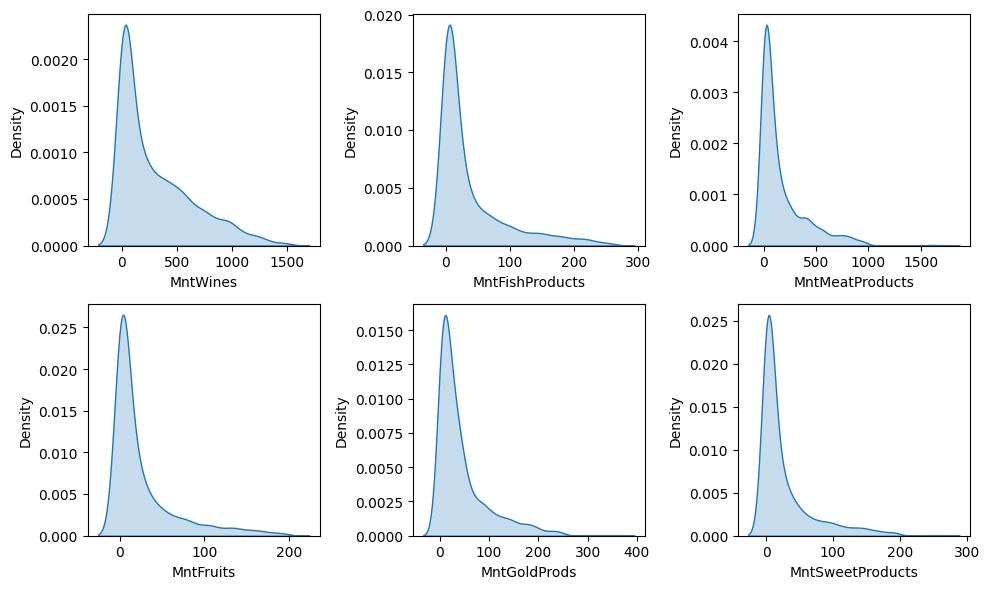

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for ax, col in zip(axes.flat, ['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntGoldProds', 'MntSweetProducts']):
  sns.kdeplot(df, x=col, fill=True, ax=ax)

fig.tight_layout()
plt.show()

The `Num[.]+` columns also have skewness

However, unlike the `Mnt[.]+` columns, they seem to descend much more slowly as the values increase

There might not be a need to remove outliers with these columns

Especially when compared to their `Response` type, the descent seems to be slightly maintained especially with `NumStorePurchases`

NumDealsPurchases skew: 2.4185693876889256
NumCatalogPurchases skew: 1.8809887777711713
NumStorePurchases skew: 0.7022372855251121
NumWebPurchases skew: 1.3827942964035893


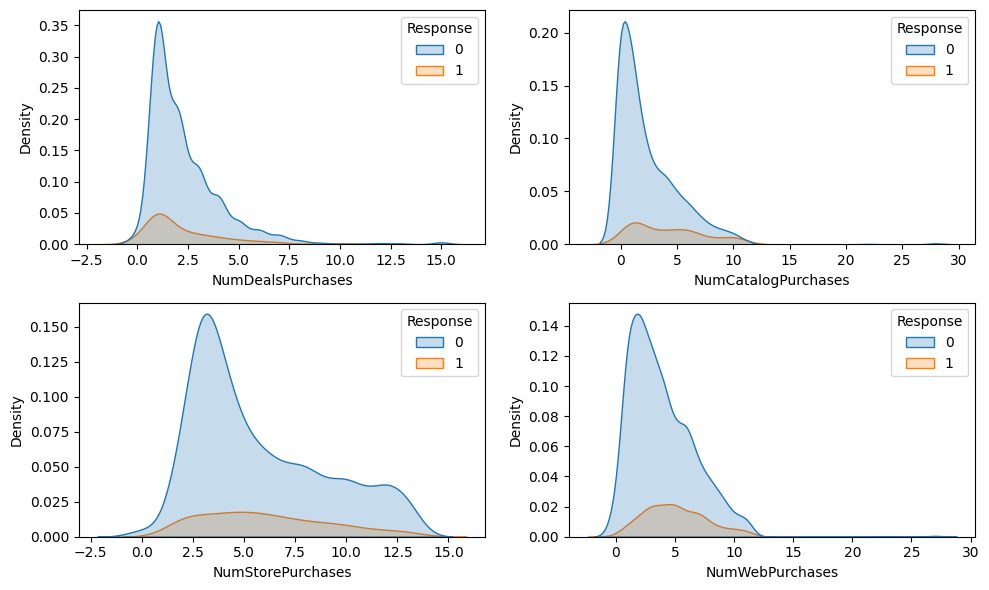

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, col in zip(axes.flat, ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']):
  print(f'{col} skew: {df[col].skew()}')
  sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)

fig.tight_layout()
plt.show()

The `Response`s seem to increase around where `NumWebVisitsMonth` reaches around 5

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Density'>

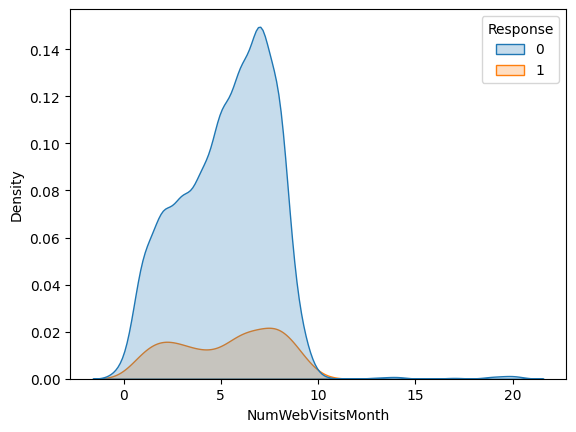

In [41]:
sns.kdeplot(df, x='NumWebVisitsMonth', fill=True, hue='Response')

## Summary

Overall these columns all show a level of skewness with their data, it's recommended to remove outliers to provide a more consistent representation of data or perform other preprocessing that makes the models more robust to outliers